# Introduction

### Who am I?
Hello 👋! 

My name is Mark Andal, and I am a 4th year computer engineering student at UCLA. 👨‍🔬🔧🔌💻

One of my interests is music 🎶🎵🎼, and so I thought it would be cool to explore it by asking:

### What Makes a Song Popular? 🔥
In this project, I hope to be doing analysis on what makes a hit song. Are there shared similarities based on a song's metadata (i.e. bpm, variability, etc)? What motivates people to listen to these types of songs? Are there specific target values for these songs that songwriters and producers aim for? 

As someone who considers music to be an important part of their life and someone who is interested in music production (though I have not dabbled in it yet), learning and analyzing trends related to music sounds like a very fun project. Researching this type of information could also help others to understand certain statistics and why they hear and potentially enjoy very similar trending and top songs. There is definitely no equation for creating a top song, but knowing the data and contextualizing it could influence the music industry.

### Data Sources 📊
I will be utilizing data from Spotify, scraped and collected from users. For example:
[Top Spotify Songs from 2010-2019 Dataset from Kaggle](https://www.kaggle.com/leonardopena/top-spotify-songs-from-20102019-by-year)
includes a list of the songs as well as metadata provided by Spotify, like the bpm, duration, etc.

Additionally, I may consider using the Spotify API to collect more data on each song if necessary.

### Scope & Visualizations 🔍
I hope to find general summary statistics for all the songs (mean, median, mode, max, etc) for the metadata categories. I would like to do comparisons by year for them and try to find trends or correleations with the metadata. This will probably include a lot of line/bar/scatter plots and histograms. 


### Predictions and Insight 💡
Analyzing this data as well as other potential areas of interest (such as how this differs globally) would provide insights and trends for popular songs. Breaking down the relationships and correlations would, for example, demonstrate that people prefer songs that have a good 'danceability' rating and a high bpm. There are lots of good insights when looking at the different information regarding these popular songs. Music is a science and an art. Understanding this can help intepret the scientific approach to this art, but it also will help to gain a deeper appreciation to music making.

# Data Exploration

In [1]:
import pandas as pd

### __Taking a look at some of the data__ 

In [2]:
top10s_df = pd.read_csv('top10s.csv')
top10s_df.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


Has an unamed column which is just the index, but pandas automatically creates an index, so will probably clean the data and drop the first column. In the meantime, I just kept it.

But otherwise the data is pretty clean and makes sense. For a better understanding, I looked on Kaggle and the official Spotify website to get the descriptions of the categories and metadata describing the songs:

### __Spotify Metadata column descriptions (cross referenced the [spotify website](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features)):__

__bpm__

Beats Per Minute - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

__nrgy__

Energy - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

__dnce__

Danceability - Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

__dB__

Loudness - The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

__live__

Liveness - Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

__dur__

Duration - The duration of the track in seconds.

__acous__

Acousticness - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

__spch__

Speechiness - Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

__pop__

Popularity- The higher the value the more popular the song is.

### __Getting summary statistics__

In [3]:
top10s_df.describe()

,Unnamed: 0,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,302.000000,2014.592040,118.545605,70.504146,64.379768,-5.578773,17.774461,52.225539,224.674959,14.326700,8.358209,66.520730
std,174.215384,2.607057,24.795358,16.310664,13.378718,2.798020,13.102543,22.513020,34.130059,20.766165,7.483162,14.517746
min,1.000000,2010.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,134.000000,0.000000,0.000000,0.000000
25%,151.500000,2013.000000,100.000000,61.000000,57.000000,-6.000000,9.000000,35.000000,202.000000,2.000000,4.000000,60.000000
50%,302.000000,2015.000000,120.000000,74.000000,66.000000,-5.000000,12.000000,52.000000,221.000000,6.000000,5.000000,69.000000
75%,452.500000,2017.000000,129.000000,82.000000,73.000000,-4.000000,24.000000,69.000000,239.500000,17.000000,9.000000,76.000000
max,603.000000,2019.000000,206.000000,98.000000,97.000000,-2.000000,74.000000,98.000000,424.000000,99.000000,48.000000,99.000000


### Finding top Genres

dance pop        327
pop               60
canadian pop      34
barbadian pop     15
boy band          15
electropop        13
british soul      11
big room          10
Name: top genre, dtype: int64


<AxesSubplot:>

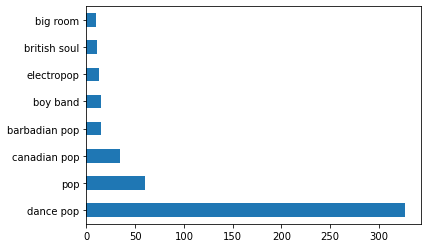

In [38]:
top_genres = list(top10s_df['top genre'].value_counts()[top10s_df['top genre'].value_counts() >= 10].index)
print(top10s_df['top genre'].value_counts()[top10s_df['top genre'].value_counts() >= 10])
top10s_df['top genre'].value_counts()[top10s_df['top genre'].value_counts() >= 10].plot(kind='barh')

Much to our surprise, pop is the king of popular songs! 🤭

### Histograms of each numerical category

array([[<AxesSubplot:title={'center':'bpm'}>,
        <AxesSubplot:title={'center':'nrgy'}>,
        <AxesSubplot:title={'center':'dnce'}>],
       [<AxesSubplot:title={'center':'dB'}>,
        <AxesSubplot:title={'center':'live'}>,
        <AxesSubplot:title={'center':'val'}>],
       [<AxesSubplot:title={'center':'dur'}>,
        <AxesSubplot:title={'center':'acous'}>,
        <AxesSubplot:title={'center':'spch'}>],
       [<AxesSubplot:title={'center':'pop'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

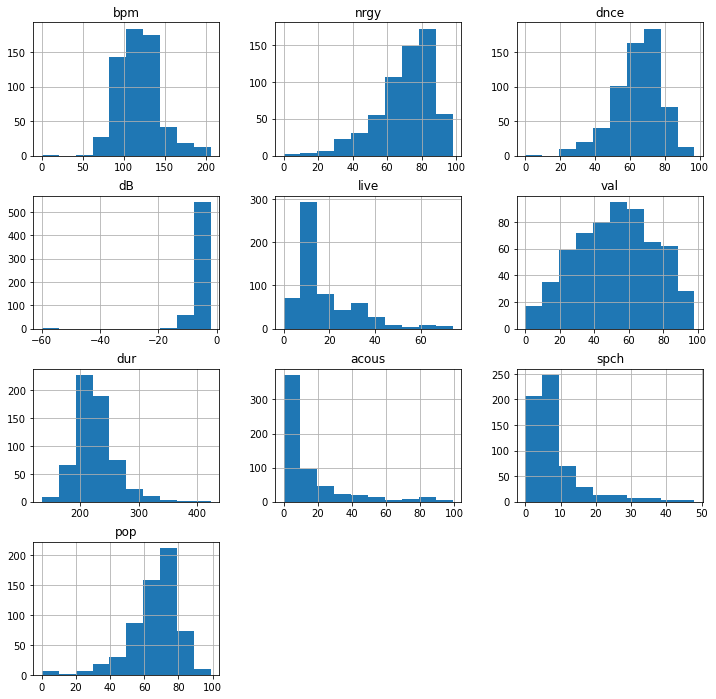

In [31]:
top10s_df[["bpm", "nrgy", "dnce", "dB", "live", "val", "dur", "acous", "spch", "pop"]].hist(figsize=(12,12))

# Data Analysis

In [5]:
import numpy as np
import matplotlib.pyplot as plt

Ideas:
* Make a table of the means for each column per year to see if year compares
* See which artists show up frequently and the elements of their songs
* See what values correlate most with popularity

### Average of Values per Year

In [6]:
year_means = top10s_df.groupby('year').mean()
years = year_means.index.to_frame()
year_means

,Unnamed: 0,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
year,,,,,,,,,,,
2010,26.0,122.058824,77.901961,64.529412,-4.901961,21.176471,57.000000,229.803922,11.627451,8.882353,64.254902
2011,78.0,119.075472,74.886792,63.641509,-5.018868,20.943396,53.698113,242.566038,13.339623,9.660377,61.867925
2012,122.0,121.085714,75.485714,65.714286,-4.857143,15.828571,64.171429,224.400000,4.857143,5.800000,67.771429
2013,175.0,121.676056,73.873239,62.042254,-5.140845,19.718310,53.183099,234.492958,10.323944,8.309859,63.985915
2014,239.5,123.000000,67.775862,62.534483,-5.775862,17.293103,52.086207,224.155172,17.551724,8.672414,62.706897
2015,316.0,119.768421,70.336842,63.663158,-5.621053,18.305263,52.526316,223.368421,16.600000,7.052632,64.568421
2016,403.5,114.325000,67.237500,63.325000,-6.712500,17.737500,45.150000,220.225000,15.875000,8.362500,64.162500
2017,476.0,116.800000,69.169231,65.369231,-5.615385,15.369231,52.276923,222.169231,16.600000,9.784615,69.015385
2018,540.5,114.593750,65.468750,67.203125,-5.671875,14.750000,48.765625,217.187500,12.781250,8.625000,72.437500


In [7]:
years['year']

year
2010    2010
2011    2011
2012    2012
2013    2013
2014    2014
2015    2015
2016    2016
2017    2017
2018    2018
2019    2019
Name: year, dtype: int64

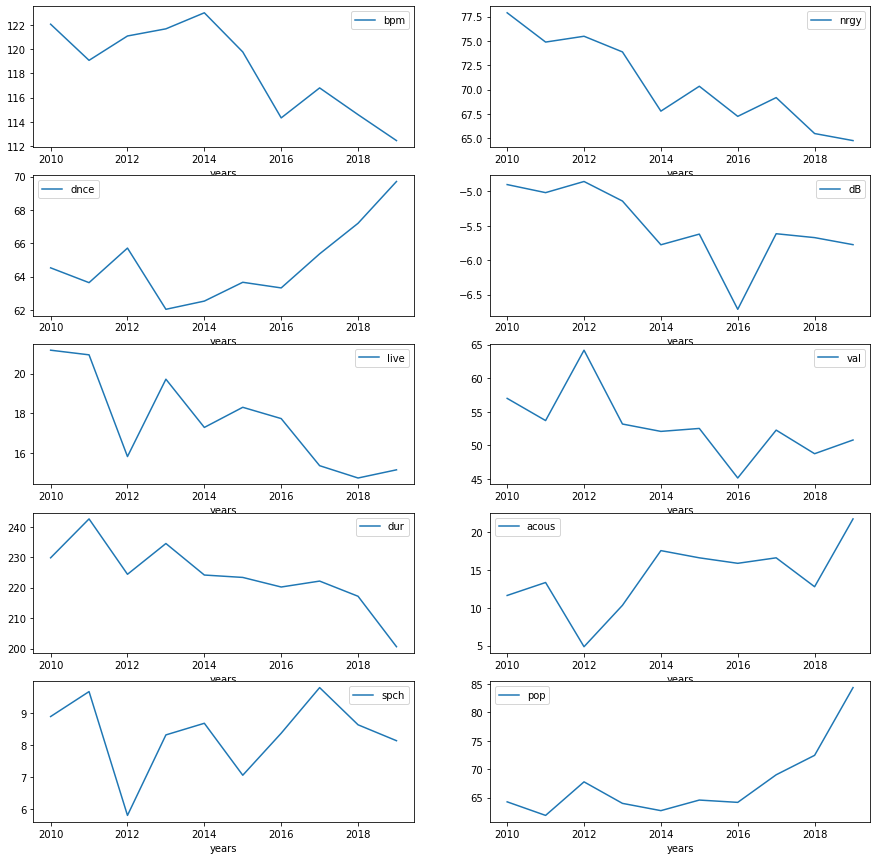

In [8]:
columns = list(top10s_df.columns)
truncated_columns = columns[5:]

fig, axes = plt.subplots(nrows=5,ncols=2,figsize=(15,15))

i = 0
j = 0

for column in truncated_columns:
    year_column = pd.DataFrame({'years': years['year'],
             column: year_means[column]},
             columns = ['years', column])
    
    year_column.plot(kind='line', x='years', y=column, subplots=True, ax = axes[i][j])
    if j == 1:
        i = i + 1
        j = 0
    else:
        j = j + 1


__Categories with trends:__

Energy has a general downwards trend

Duration has a general downwards trend

Danceability has a general upwards trned

Tempo seems to go down too

### Column values in correlation with popularity

In [16]:
def find_correlations(df):
    
    columns = list(df.columns)
    truncated_columns = columns[5:-1]
    popularity = columns[len(columns)-1]

    # print(truncated_columns)
    # print(popularity)

    correlations = []
    for column in truncated_columns:
        corr = np.corrcoef(df[column],df['pop'])
        correlations.append(corr[0,1])

    print(correlations)

    max_corr_column_name = truncated_columns[correlations.index(max(correlations))]
    print('max correlation coefficient =', max(correlations), '-', max_corr_column_name)
    return max_corr_column_name, max(correlations)
    
top10s_max_corr_column_name, top10s_max_corr = find_correlations(top10s_df)

[0.01898298213263349, -0.05764503617766637, 0.11605444461442091, 0.15689721632507797, -0.07574905467401405, 0.0389525866357596, -0.10436275315485515, 0.02670353364616181, -0.04149018806161328]
max correlation coefficient = 0.15689721632507797 - dB


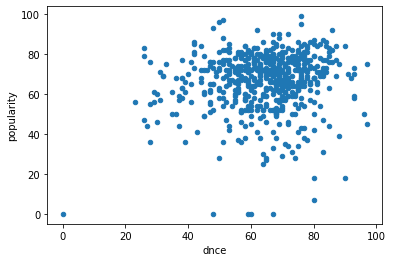

In [21]:
def plot_max_correlations(top_column, df):
    # fix_dB = top10s_df['dB'] > -60
    topColumn_pop = pd.DataFrame({top_column: df[top_column],
                 'popularity': df['pop']},
                 columns = [top_column, 'popularity'])

    topColumn_pop.plot(kind='scatter', x=top_column, y='popularity')
    
plot_max_correlations('dnce', top10s_df)

### Artist Frequency + seeing their songs

In [11]:
top10s_artists = list(top10s_df['artist'].value_counts()[top10s_df['artist'].value_counts() >= 10].index)
print(top10s_df['artist'].value_counts()[top10s_df['artist'].value_counts() >= 10])

Katy Perry          17
Justin Bieber       16
Rihanna             15
Maroon 5            15
Lady Gaga           14
Bruno Mars          13
Shawn Mendes        11
Pitbull             11
Ed Sheeran          11
The Chainsmokers    11
Calvin Harris       10
Jennifer Lopez      10
Adele               10
Name: artist, dtype: int64


In [13]:
artist_dfs = []
for artist in top10s_artists:
    artist_dfs.append(top10s_df.loc[top10s_df['artist'] == artist])

Do these popular artists follow the general averages of all the songs, or do they have their own style that gets popular?

Idea:
* compare artist averages to general averages
* see per artist if there is any particular category that allows them to be a regular on these charts and top hits

Example of top artist katy perry's df:

In [40]:
artist_dfs[0]

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
28,29,Teenage Dream,Katy Perry,dance pop,2010,120,80,72,-5,13,59,228,2,4,63
29,30,California Gurls,Katy Perry,dance pop,2010,125,75,79,-4,18,40,235,0,5,62
77,78,E.T.,Katy Perry,dance pop,2011,152,87,62,-5,37,76,230,2,18,66
101,102,Last Friday Night (T.G.I.F.),Katy Perry,dance pop,2011,126,81,65,-4,67,72,231,0,4,27
102,103,Firework,Katy Perry,dance pop,2011,124,83,64,-5,11,65,228,14,5,25
124,125,Part Of Me,Katy Perry,dance pop,2012,130,92,68,-5,7,77,216,0,4,71
127,128,Wide Awake,Katy Perry,dance pop,2012,160,68,51,-5,39,57,221,7,4,68
128,129,The One That Got Away,Katy Perry,dance pop,2012,134,80,69,-4,16,88,227,0,4,67
144,145,Roar,Katy Perry,dance pop,2013,180,77,55,-5,35,46,224,0,4,78
216,217,Dark Horse,Katy Perry,dance pop,2014,132,59,65,-6,17,35,216,0,5,78


Katy Perry
[0.254361719018524, -0.3539041207177192, -0.002818218265000605, -0.3592096871913068, -0.25868770324118645, -0.13283327246037477, -0.140879483108938, -0.2379389208554749, 0.09594858032576592]
max correlation coefficient = 0.254361719018524 - bpm
-----------------------------
Justin Bieber
[-0.32241192826376874, 0.046160207738625524, 0.28834353495233406, 0.025697130381322465, 0.049203360046809294, -0.0728102933223985, 0.14978381407931687, 0.18391093196457609, 0.5831113652322795]
max correlation coefficient = 0.5831113652322795 - spch
-----------------------------
Rihanna
[0.21521028761569053, -0.6492944101247556, 0.18614817299770825, -0.33563766884107477, -0.41035928893159074, -0.3176210152278232, -0.16615065893197345, 0.3356587535308125, 0.37332955264129164]
max correlation coefficient = 0.37332955264129164 - spch
-----------------------------
Maroon 5
[-0.15005520508074266, -0.691477779223326, 0.20939885480804007, -0.3306352061946974, -0.08285910547804298, 0.0679552939714106

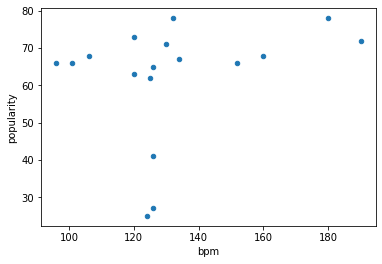

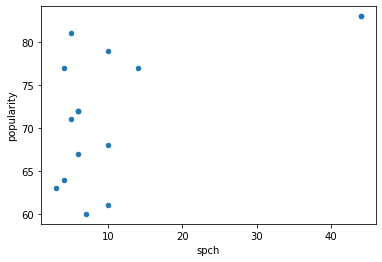

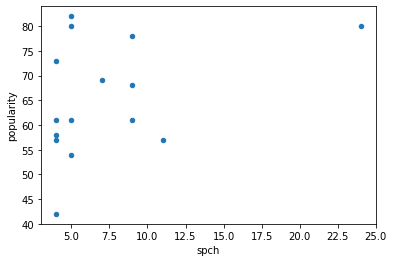

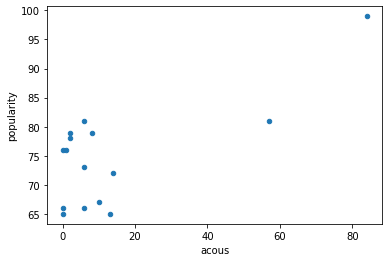

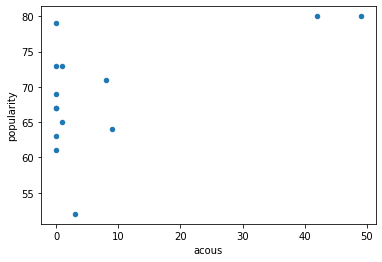

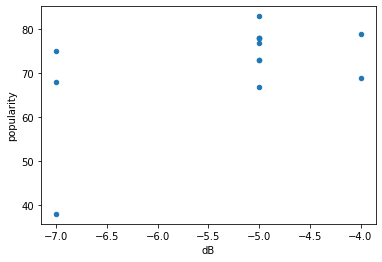

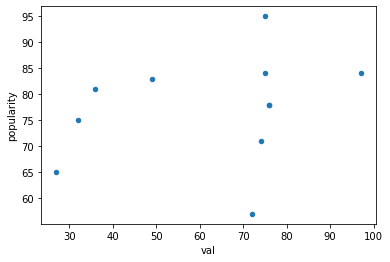

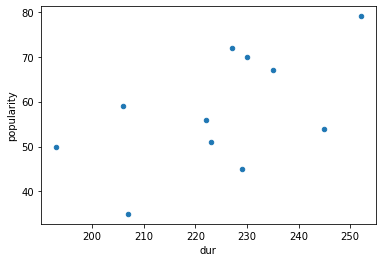

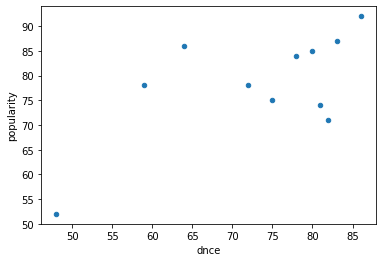

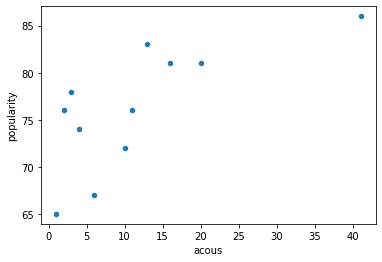

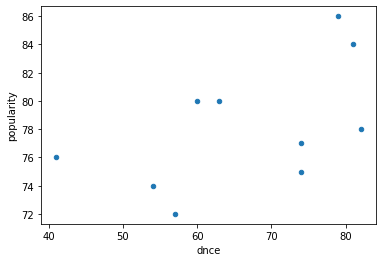

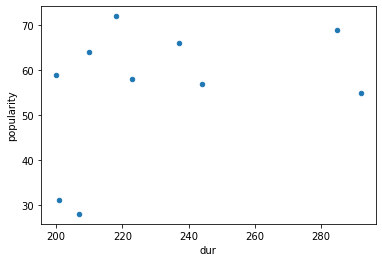

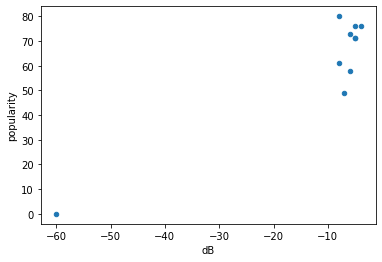

In [47]:
for i, artist_df in enumerate(artist_dfs):
    print(top10s_artists[i])
    arist_max_corr_column_name, artist_max_corr = find_correlations(artist_df)
    plot_max_correlations(arist_max_corr_column_name, artist_df)
    print('-----------------------------')

Seems like correlation with popularity isn't a great measure. With less samples when identifying per artist, it probably makes it even harder and less accurate, which is why there are some high values for the correlation coefficient but the scatter plots don't rly have any visual indiciation

### Comparison between genres

In [44]:
top10s_df.groupby('top genre')


# top10s_df.loc[top10s_df['top genre'] == artist])

# More possible data exploration + analysis w/ bigger database

Found an even more [extensive databse](https://www.kaggle.com/iamsumat/spotify-top-2000s-mega-dataset) that has about 2000 songs from 1956-2019. I was only initially analyzing 2010-2019, so it would be interesting to compare decades and see how more modern and recent songs compare to older songs 

Ideas:
* compare genres per decade
* see how more modern songs compare to older songs

In [46]:
spotify2000_df = pd.read_csv('Spotify-2000.csv')
spotify2000_df.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


album rock           413
adult standards      123
dutch pop             88
alternative rock      86
dance pop             83
dutch indie           75
alternative metal     70
dance rock            52
classic rock          51
dutch cabaret         51
glam rock             49
modern rock           49
pop                   47
art rock              40
permanent wave        38
british invasion      36
irish rock            34
british soul          31
europop               27
classic uk pop        22
disco                 18
dutch rock            18
glam metal            17
neo mellow            17
blues rock            15
alternative dance     15
art pop               14
dutch hip hop         13
funk                  13
dutch americana       12
classic soul          11
big beat              11
britpop               11
mellow gold           11
carnaval limburg      10
Name: Top Genre, dtype: int64


<AxesSubplot:>

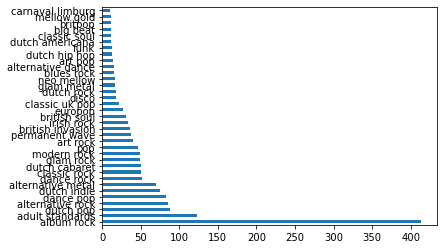

In [48]:
top_genres = list(spotify2000_df['Top Genre'].value_counts()[spotify2000_df['Top Genre'].value_counts() >= 10].index)
print(spotify2000_df['Top Genre'].value_counts()[spotify2000_df['Top Genre'].value_counts() >= 10])
spotify2000_df['Top Genre'].value_counts()[spotify2000_df['Top Genre'].value_counts() >= 10].plot(kind='barh')

When considering top hits from more past years, there's a bigger range of genres. Notably, rock is very prevalent.

/tmp/ipykernel_165/1533170649.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  genre_means = spotify2000_df.loc[spotify2000_df['Top Genre'] == genre].mean()


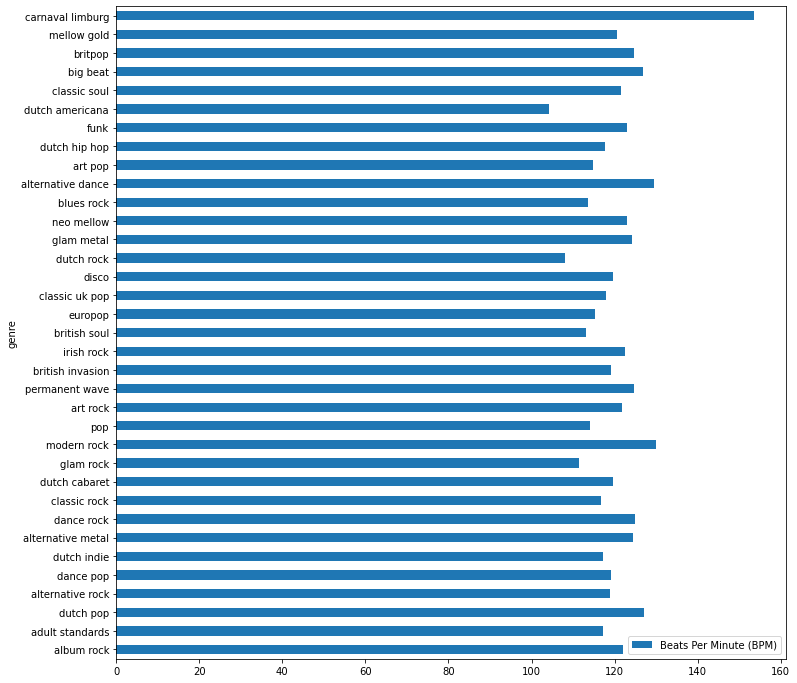

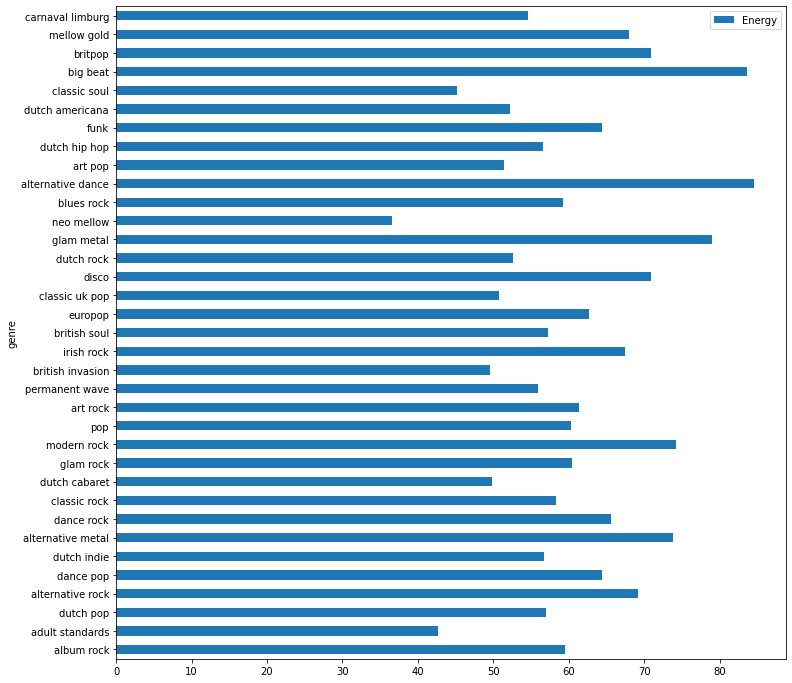

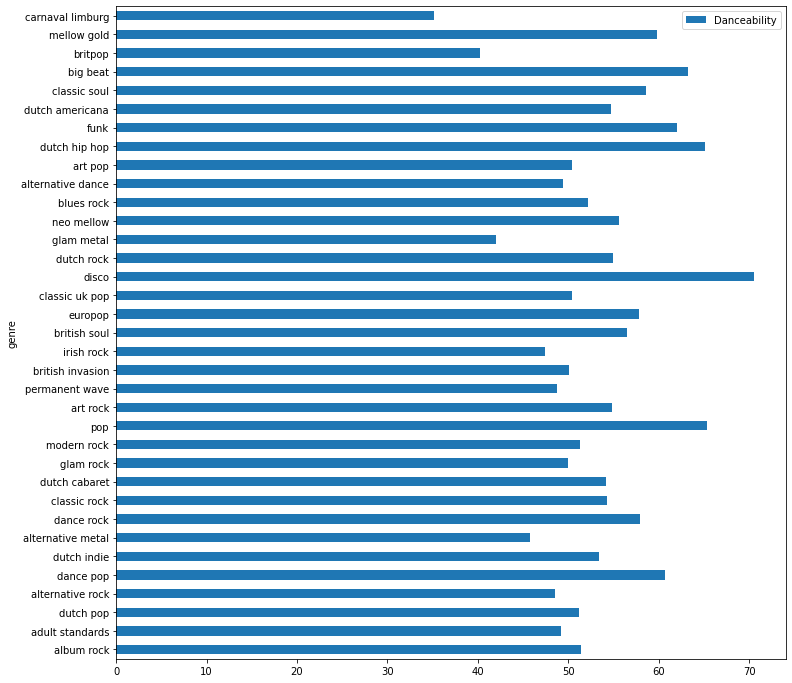

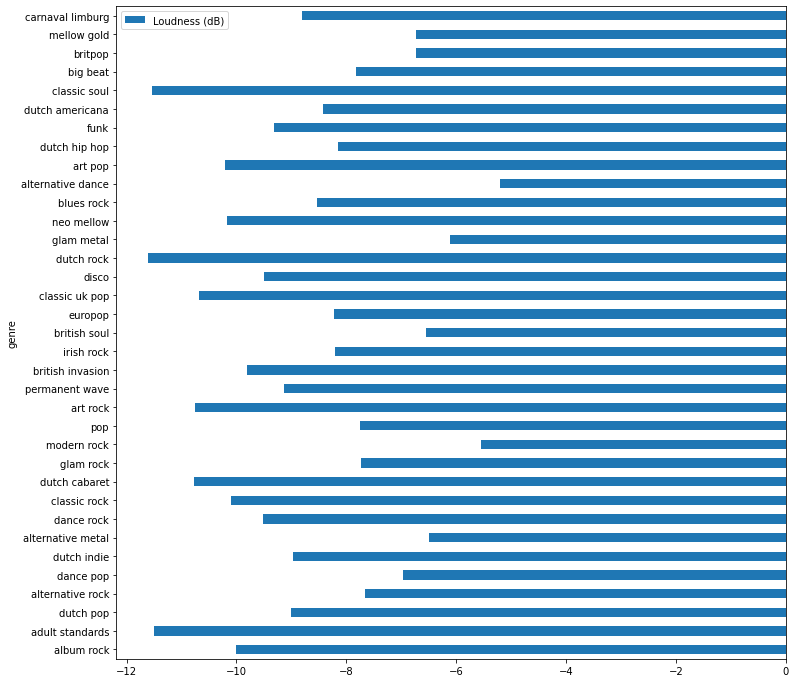

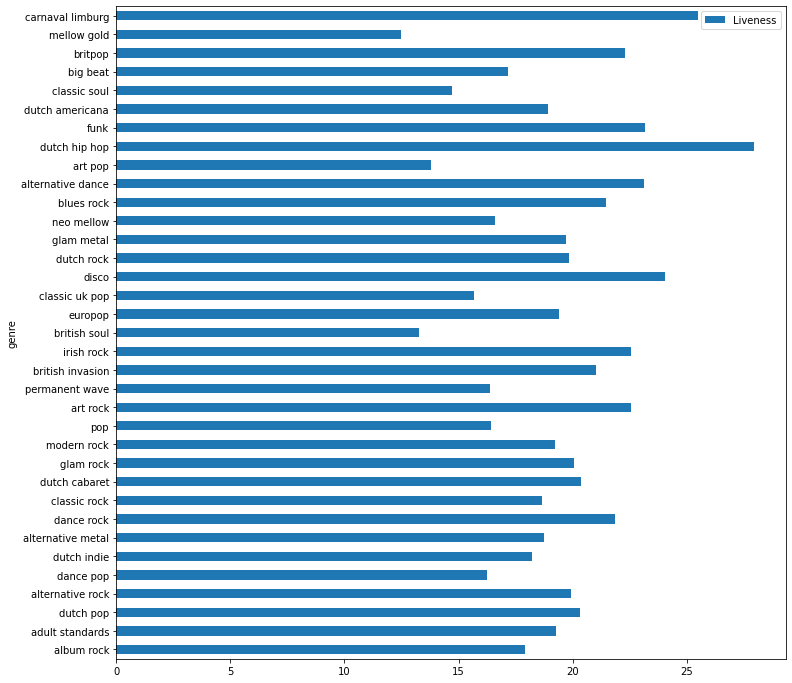

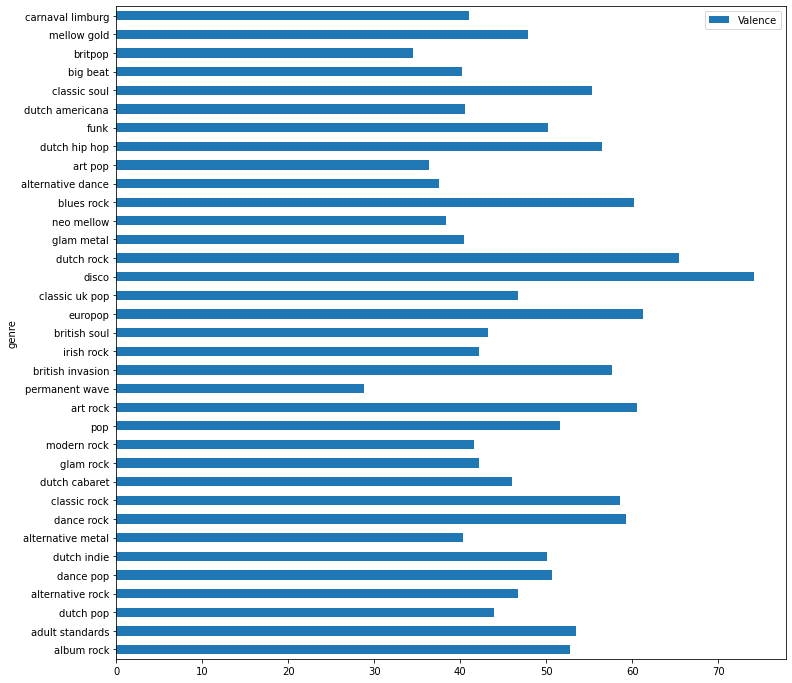

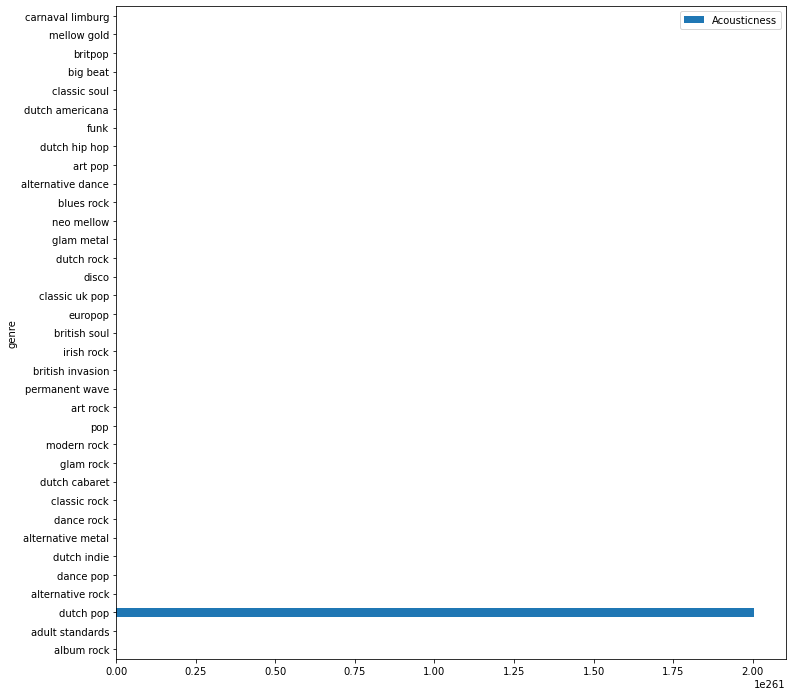

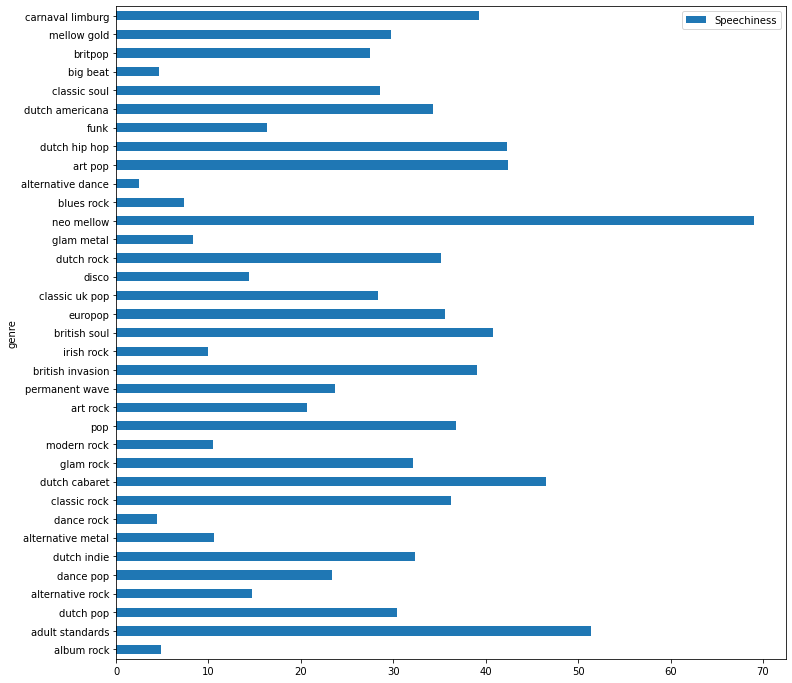

In [103]:
columns = list(spotify2000_df.columns)
truncated_columns = columns[5:-1]
truncated_columns.remove('Length (Duration)')

for i, column in enumerate(truncated_columns):
    category_list = []
    for genre in top_genres:
        genre_means = spotify2000_df.loc[spotify2000_df['Top Genre'] == genre].mean()
        values = list(genre_means.values)[2:-1]
        if 'Length (Duration)' in values:
            values.remove('Length (Duration)')
        category_list.append(values[i])
    
    column_genres = pd.DataFrame({'genre': top_genres,
             column: category_list},
             columns = ['genre', column])
    
    column_genres.plot(kind='barh', x='genre', figsize=(12,12))

Hard to compare and see if there any differences, will ask for advice. Maybe need to limit the # of genres. Maybe printing it out or doing some sort of heat map or something will help? Maybe there isn't even a significant difference, but as of now just doing lots of bar charts is too difficult to read.